In [1]:
import numpy as np
import pandas as pd 


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
os.getcwd()

'C:\\Users\\Mostafijur Rahman\\Desktop\\My Project\\Data Science Project\\TopperWorld\\Detection of Road lane line'

In [4]:

train_path = 'C:/Users/Mostafijur Rahman/Desktop/My Project/Data Science Project/TopperWorld/Detection of Road lane line/Data/data_road_224/training'
test_path = 'C:/Users/Mostafijur Rahman/Desktop/My Project/Data Science Project/TopperWorld/Detection of Road lane line/Data/data_road_224/testing'



In [7]:
IMG_DIM = 32
CLASSES = sorted(['Class1','Class2'])

In [8]:
train_gen = ImageDataGenerator().flow_from_directory(
    directory=train_path, 
    target_size = (IMG_DIM,IMG_DIM), 
    classes=CLASSES)

val_gen = ImageDataGenerator( validation_split=0.2).flow_from_directory(
    directory=train_path, 
    target_size = (IMG_DIM,IMG_DIM), 
    classes=CLASSES, 
    subset='validation')

test_gen = ImageDataGenerator().flow_from_directory(
    directory=test_path, 
    target_size = (IMG_DIM,IMG_DIM), 
    classes=CLASSES, 
    shuffle=False)

Found 289 images belonging to 2 classes.
Found 57 images belonging to 2 classes.
Found 290 images belonging to 2 classes.


In [9]:
train_gen.class_indices

{'Class1': 0, 'Class2': 1}

In [10]:
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from keras.layers import Dense, GlobalAvgPool2D

In [11]:
pretrained = ResNet152(
    input_shape=(IMG_DIM, IMG_DIM, 3),
    include_top=False
)
pretrained.trainable = False

model = Sequential()
model.add(pretrained)
model.add(GlobalAvgPool2D())
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

MODEL_PATH = 'saved-models/resnet'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 1, 1, 2048)        58370944  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 58,375,042
Trainable params: 4,098
Non-trainable params: 58,370,944
_________________________________________________________________


In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(MODEL_PATH,
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[checkpoint],
)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.6408 - accuracy: 0.5260
Epoch 1: val_loss improved from inf to 1.07505, saving model to saved-models\resnet
10/10 [==============================] - 36s 2s/step - loss: 1.6408 - accuracy: 0.5260 - val_loss: 1.0751 - val_accuracy: 0.5789
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 1.2971 - accuracy: 0.5433
Epoch 2: val_loss did not improve from 1.07505
10/10 [==============================] - 4s 483ms/step - loss: 1.2971 - accuracy: 0.5433 - val_loss: 1.3568 - val_accuracy: 0.6316
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.1038 - accuracy: 0.6090
Epoch 3: val_loss improved from 1.07505 to 0.87567, saving model to saved-models\resnet
10/10 [==============================] - 37s 4s/step - loss: 1.1038 - accuracy: 0.6090 - val_loss: 0.8757 - val_accuracy: 0.5263
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.8530 - accuracy: 0.6436
Epoch 4: val_los

Epoch 29/30
10/10 [==============================] - ETA: 0s - loss: 0.1952 - accuracy: 0.9308
Epoch 29: val_loss did not improve from 0.16647
10/10 [==============================] - 4s 435ms/step - loss: 0.1952 - accuracy: 0.9308 - val_loss: 0.2175 - val_accuracy: 0.9123
Epoch 30/30
10/10 [==============================] - ETA: 0s - loss: 0.1622 - accuracy: 0.9585
Epoch 30: val_loss improved from 0.16647 to 0.16012, saving model to saved-models\resnet
10/10 [==============================] - 35s 4s/step - loss: 0.1622 - accuracy: 0.9585 - val_loss: 0.1601 - val_accuracy: 0.9825


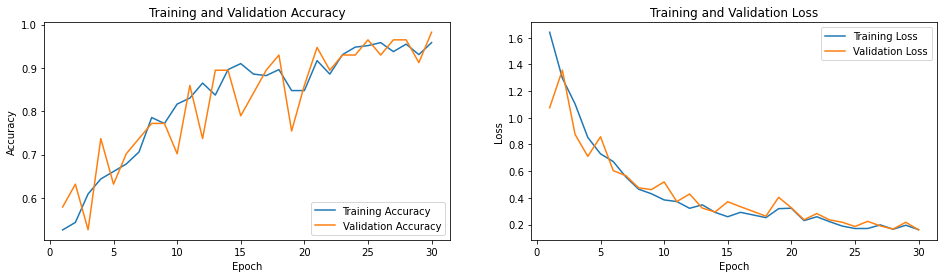

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
score = model.evaluate(test_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


10/10 [==============================] - 12s 1s/step - loss: 1.3061 - accuracy: 0.4379
Test loss: 1.306119441986084
Test accuracy: 0.43793103098869324


In [15]:
score = model.evaluate(train_gen)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

10/10 [==============================] - 4s 382ms/step - loss: 0.1490 - accuracy: 0.9723
Train loss: 0.14899340271949768
Train accuracy: 0.9723183512687683


In [16]:
predict=model.predict(test_gen)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

10/10 [==============================] - 17s 899ms/step


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [17]:
predictions = model.predict(x = test_gen, verbose=0)

In [18]:
cm = confusion_matrix(y_true=test_gen.classes, y_pred=np.argmax(predict, axis=-1))

(2.5, -0.5)

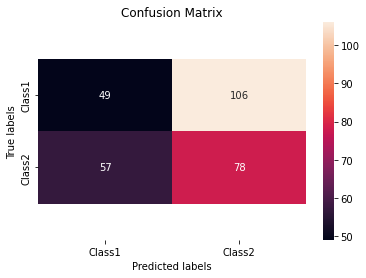

In [19]:
import seaborn as sn
ax= plt.subplot()
sn.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Class1', 'Class2']);ax.yaxis.set_ticklabels(['Class1', 'Class2']);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import mean_squared_error

In [21]:
print(classification_report(test_gen.classes, y_classes))

              precision    recall  f1-score   support

           0       0.46      0.32      0.38       155
           1       0.42      0.58      0.49       135

    accuracy                           0.44       290
   macro avg       0.44      0.45      0.43       290
weighted avg       0.44      0.44      0.43       290



In [22]:
roc_auc = roc_auc_score(test_gen.classes, np.argmax(predict, axis=-1))

print(roc_auc)

0.44695340501792113


In [23]:
mse = mean_squared_error(test_gen.classes, np.argmax(predict, axis=-1))
rmse = np.sqrt(mse)
print(rmse)

0.7497125886079554


In [24]:
print(accuracy_score(test_gen.classes, np.argmax(predictions, axis=-1)))

0.4379310344827586
